In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ======================
# Load artifacts
# ======================
vectorizer = joblib.load("../data/vectorizers/text_vectorizer.joblib")
label_encoder = joblib.load("../data/models/label_encoder.joblib")


Evaluating logistic_regression...
                              precision    recall  f1-score   support

             [GDC_FR]_AppOps       0.20      0.33      0.25         3
              [GDC_FR]_DbOps       0.50      0.86      0.63        14
      [GDC_FR]_Helpdesk_Sefi       0.89      0.96      0.92       225
         [GDC_FR]_Monitoring       0.00      0.00      0.00         2
             [GDC_FR]_SecOps       0.61      0.55      0.58        20
[GDC_WW]_ITOps - GDU_Infra_1       0.93      0.88      0.90       115
[GDC_WW]_ITOps - GDU_Infra_2       0.85      0.75      0.79        67
             [GDC_WW]_SAP_BC       0.93      0.85      0.89        97
                    [SFI]_IT       0.17      0.09      0.12        11
                   [SFI]_SAP       0.33      0.33      0.33         3

                    accuracy                           0.85       557
                   macro avg       0.54      0.56      0.54       557
                weighted avg       0.86      0.85    

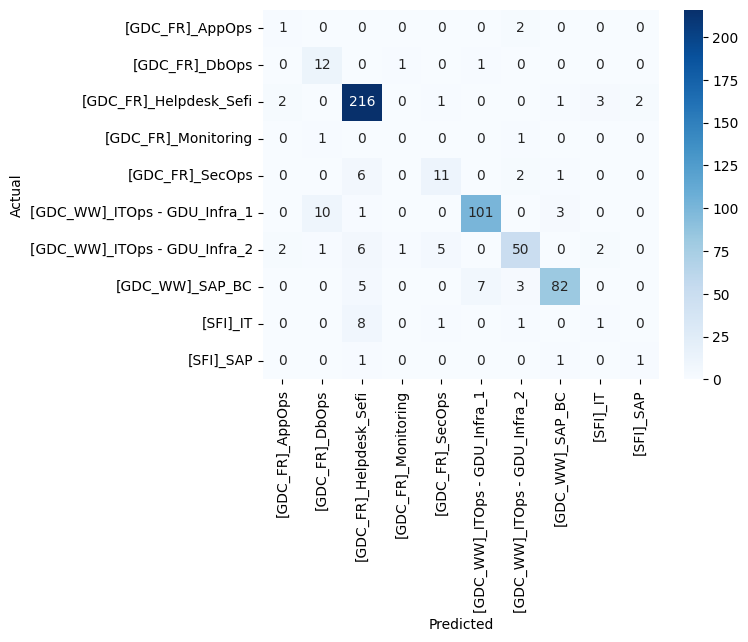


Evaluating random_forest...
                              precision    recall  f1-score   support

             [GDC_FR]_AppOps       0.00      0.00      0.00         3
              [GDC_FR]_DbOps       0.50      0.50      0.50        14
      [GDC_FR]_Helpdesk_Sefi       0.85      0.98      0.91       225
         [GDC_FR]_Monitoring       0.00      0.00      0.00         2
             [GDC_FR]_SecOps       0.67      0.50      0.57        20
[GDC_WW]_ITOps - GDU_Infra_1       0.88      0.90      0.89       115
[GDC_WW]_ITOps - GDU_Infra_2       0.81      0.72      0.76        67
             [GDC_WW]_SAP_BC       0.92      0.80      0.86        97
                    [SFI]_IT       0.00      0.00      0.00        11
                   [SFI]_SAP       0.50      0.33      0.40         3

                    accuracy                           0.84       557
                   macro avg       0.51      0.47      0.49       557
                weighted avg       0.82      0.84      0.83

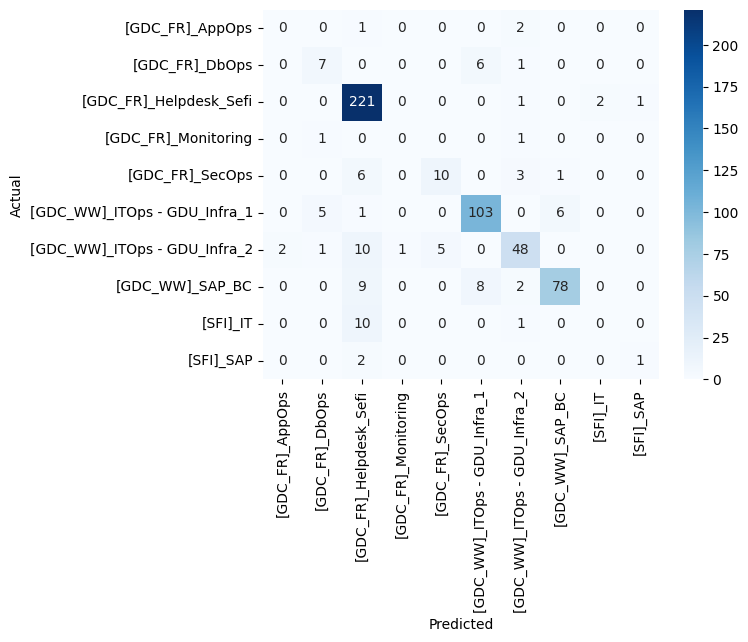


Evaluating multinomial_nb...
                              precision    recall  f1-score   support

             [GDC_FR]_AppOps       0.07      0.33      0.11         3
              [GDC_FR]_DbOps       0.48      0.93      0.63        14
      [GDC_FR]_Helpdesk_Sefi       0.92      0.84      0.88       225
         [GDC_FR]_Monitoring       0.12      0.50      0.20         2
             [GDC_FR]_SecOps       0.57      0.65      0.60        20
[GDC_WW]_ITOps - GDU_Infra_1       0.92      0.84      0.88       115
[GDC_WW]_ITOps - GDU_Infra_2       0.84      0.70      0.76        67
             [GDC_WW]_SAP_BC       0.93      0.80      0.86        97
                    [SFI]_IT       0.17      0.27      0.21        11
                   [SFI]_SAP       0.07      0.33      0.12         3

                    accuracy                           0.80       557
                   macro avg       0.51      0.62      0.53       557
                weighted avg       0.86      0.80      0.8

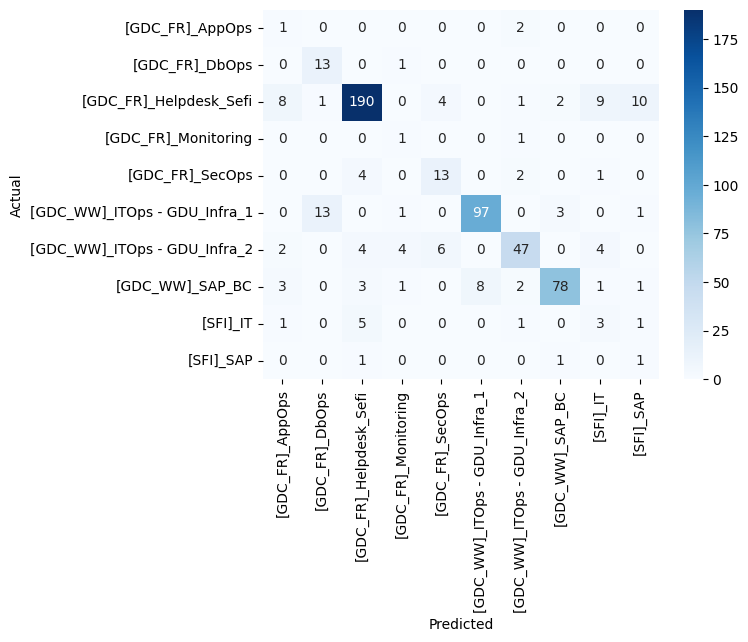

In [6]:

# ======================
# Load X_test and y_test
# ======================
X_test = pd.read_csv("../data/splits/X_test.csv")["Title"]
y_test = pd.read_csv("../data/splits/y_test.csv")["label"]

models = {
    "logistic_regression": joblib.load("../data/models/logistic_regression.joblib"),
    "random_forest": joblib.load("../data/models/random_forest.joblib"),
    "multinomial_nb": joblib.load("../data/models/multinomial_nb.joblib"),
}

# ======================
# Vectorize TEST ONLY
# ======================
X_test_vec = vectorizer.transform(X_test)

# ======================
# Evaluate
# ======================
for name, model in models.items():
    print(f"\nEvaluating {name}...")

    y_pred = model.predict(X_test_vec)

    print(
        classification_report(
            y_test,
            y_pred,
            target_names=label_encoder.classes_,
            zero_division=0
        )
    )

    cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:")
    # print(cm)
    le = joblib.load("../data/models/label_encoder.joblib")
    # le=label_encoder
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()